In [1]:
using BeamLib: IsotropicArray, steer, music
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# MUSIC spectrum
ϕaxis = LinRange(-90, 90, 360)
P = music(pa, Rxx, d, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 461.3792820289261
 458.8041237318571
 451.20718168979795
 438.96001095199347
 422.63768858993035
 402.96100692114754
 380.73009609676006
 356.759390321682
 331.8219516895256
 306.60806254116653
   ⋮
 542.7902154102733
 496.4973796954919
 461.0077532863586
 433.87007827917057
 413.4113555438213
 398.4839949743413
 388.31158209181535
 382.39418234944117
 380.4517794968708

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

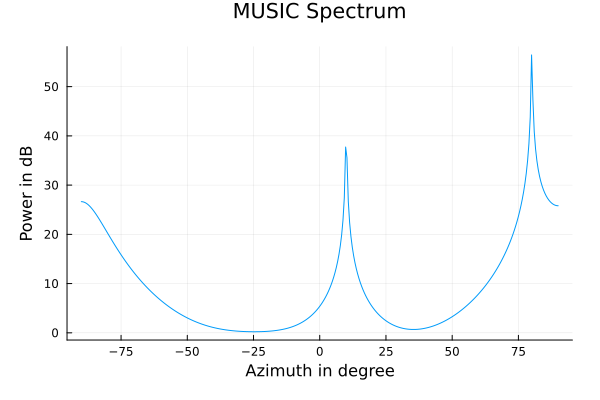

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="MUSIC Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")